In [1]:
from __future__ import division
import warnings
import string

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
# Information about the data is here: http://anthology.aclweb.org/H/H93/H93-1005.pdf
# feature descriptions: http://www.cs.columbia.edu/~djhsu/coms4721-s16/project/field_types.txt

In [3]:
task = pd.read_csv('./competition/data/data.csv')
quiz = pd.read_csv('./competition/data/quiz.csv')

In [4]:
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### EDA

In [5]:
alphabet = list(string.ascii_lowercase)
alphabet2 = alphabet + [l+l for l in alphabet] + ['aaa']

In [40]:
boolean_cols = [
    'g', 'p', 'q', 's',
    'v', 'w', 'y', 'z',
    'oo', 'pp', 'qq', 'rr',
    'xx', 'yy', 'zz'
]

In [41]:
task[boolean_cols]

,g,p,q,s,v,w,y,z,oo,pp,qq,rr,xx,yy,zz
0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0
5,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0
6,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
7,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0
8,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0


In [26]:
task.columns = alphabet2

In [37]:
for col in task.columns:
    print col
    print task[col].value_counts()
    print '\n'

a
def        59038
indef      25712
null       20714
pro        10182
dctc        3589
poss        2751
el          2037
dem         1453
numpro       564
num          435
relpro       175
demnum        94
posspro       93
dtype: int64


b
0    126297
1       540
dtype: int64


c
dobj                    36616
prep_of                 14731
nsubj                   12404
root                     8131
pobj                     6863
prep_to                  4590
nn                       3789
dep                      3766
prep_above               3447
prep_below               3044
prep_from                2278
conj_and                 2262
prep_underneath          2262
prep_towards             1992
prep_at                  1313
ccomp                    1236
prep_between             1129
prep_with                1074
prep_past                1070
prep_in                  1042
prep_under                927
advmod                    890
xcomp                     778
amod                      759

In [28]:
numeric_cols = [
    'bb', 'cc', 'dd', 'ee', 'ff', 
    'gg', 'hh', 'ii', 'jj', 'kk', 'll', 
    'mm', 'nn', 'oo', 'pp', 'qq', 'rr', 'vv', 
    'ww', 'xx', 'yy', 'zz', 'z', 'aa', 'x', 
    'y', 'b', 'q', 'r', 'p', 't', 'u', 'v', 
    'w', 's', 'g', 'aaa'
]

categorical_cols = [
    
]

In [43]:
numdf = task[boolean_cols]

In [11]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [12]:
seed = np.random.RandomState(seed=3)

In [ ]:
X = numdf.ix[:1000]

In [23]:
# X_norm = (X - X.mean()) / (X.max() - X.min())

In [46]:
similarities = euclidean_distances(X)

In [47]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)

In [ ]:
pos = mds.fit(similarities).embedding_

In [36]:
posdf = pd.DataFrame(pos, columns= ['x', 'y'])
posdf['label'] = task.aaa[:1001]

In [37]:
task.aaa.value_counts()

-1    71146
 1    55691
dtype: int64

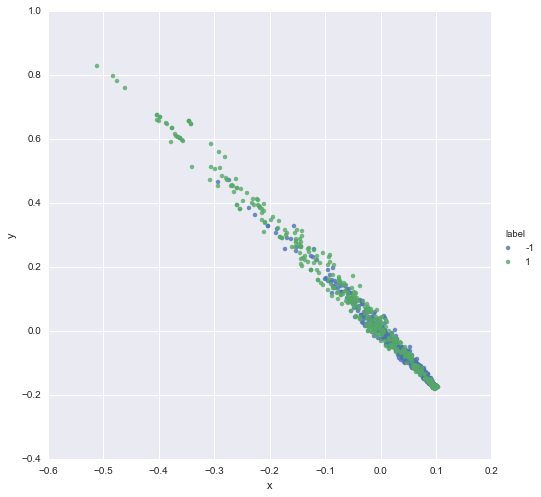

In [38]:
sns.lmplot('x', 'y', posdf, fit_reg=False, hue='label', size=7)

In [ ]:
# check for separability. Nope, not separable.
# http://stats.stackexchange.com/questions/47923/test-for-linear-separability

In [42]:
# X = boolean_df.as_matrix()
y = task.aaa[:1001]

In [31]:
from sklearn.svm import SVC
# clf = SVC(kernel='rbf')
clf = SVC(gamma=2, C=1)
clf.fit(X, y)
clf.score(X, y)

0.9619019049047548

In [ ]:
# y.plot(kind='bar')

### Testing Multiple Classifiers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()